# 1. Judul / Topik Project dan Identitas Lengkap

Judul: Klasifikasi Kualitas Kopi Menggunakan Machine Learning: Perbandingan K-Nearest Neighbors (KNN) dan Support Vector Machines (SVM)


Identitas:

*   Nama: Fajar Adji Wicaksana
*   NIM: A11.2022.14147
*   Kelompok : Machine Learning 4410

# 2. Ringkasan dan Permasalahan Project + Tujuan yang Akan Dicapai + Model / Alur Penyelesaian

## Ringkasan

Proyek ini bertujuan untuk mengklasifikasikan kualitas kopi berdasarkan berbagai fitur menggunakan algoritma KNN dan SVM. Dataset yang digunakan berisi informasi mengenai karakteristik fisik dan kimia dari biji kopi yang diuji.

## Permasalahan

Permasalahan yang dihadapi adalah bagaimana mengklasifikasikan kualitas kopi dengan akurasi tinggi menggunakan teknik machine learning. Kualitas kopi dapat dipengaruhi oleh banyak faktor, sehingga memilih fitur yang tepat dan model yang efisien sangat penting.

## Tujuan

Mengidentifikasi fitur-fitur yang mempengaruhi kualitas kopi. Membangun model KNN dan SVM untuk klasifikasi kualitas kopi. Membandingkan performa kedua model dan menentukan model yang paling akurat.

## Model / Alur Penyelesaian

In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!python -m pip install --upgrade pip

In [7]:
!pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 2.0 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.7 MB 2.1 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.7 MB 1.7 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.7 MB 2.0 MB/s eta 0:00:01
   ------ --------------------------------- 0.3/1.7 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 1.8 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.7 MB 2.0 MB/s eta 0:00:01
   ---------------------- ----------------- 1.0/1.7 MB 2.0 MB/s eta 0:00:01
   ----------------

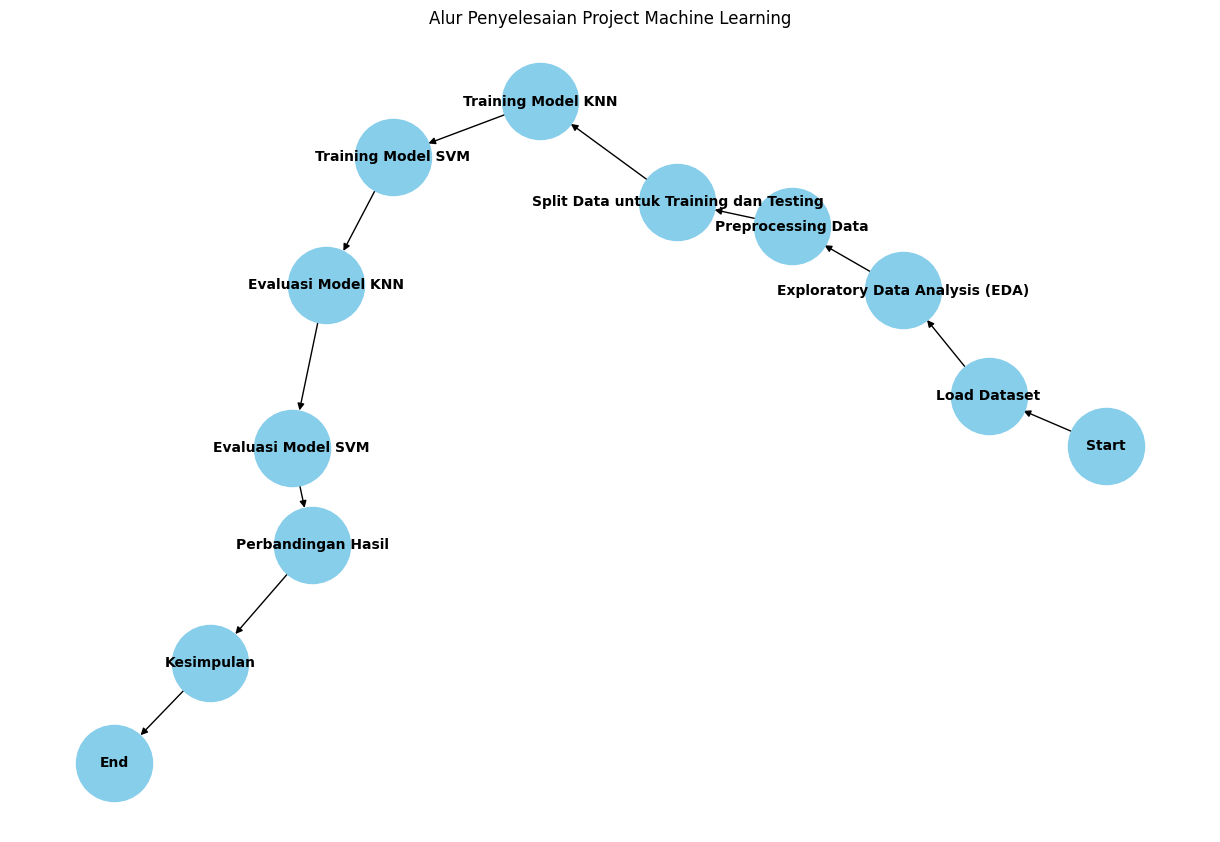

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Buat graph
G = nx.DiGraph()

# Tambahkan nodes dan edges
nodes = ["Start", "Load Dataset", "Exploratory Data Analysis (EDA)", "Preprocessing Data",
         "Split Data untuk Training dan Testing", "Training Model KNN", "Training Model SVM",
         "Evaluasi Model KNN", "Evaluasi Model SVM",
         "Perbandingan Hasil", "Kesimpulan", "End"]
edges = [("Start", "Load Dataset"), ("Load Dataset", "Exploratory Data Analysis (EDA)"),
         ("Exploratory Data Analysis (EDA)", "Preprocessing Data"),
         ("Preprocessing Data", "Split Data untuk Training dan Testing"),
         ("Split Data untuk Training dan Testing", "Training Model KNN"),
         ("Training Model KNN", "Training Model SVM"),
         ("Training Model SVM", "Evaluasi Model KNN"),
         ("Evaluasi Model KNN", "Evaluasi Model SVM"),
         ("Evaluasi Model SVM", "Perbandingan Hasil"),
         ("Perbandingan Hasil", "Kesimpulan"), ("Kesimpulan", "End")]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Buat layout
pos = nx.spring_layout(G)

# Gambar graf
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Alur Penyelesaian Project Machine Learning")
plt.show()

# 3. Penjelasan Dataset, EDA dan Proses Features Dataset

## Dataset

Dataset yang digunakan berasal dari [Kaagle](https://www.kaggle.com/datasets/hanifalirsyad/coffee-scrap-coffeereview). Dataset ini mencakup berbagai atribut yang mencerminkan kualitas kopi seperti aroma, rasa, dan kandungan kimia.

## Exploratory Data Analysis (EDA)

EDA dilakukan untuk memahami distribusi data, mengidentifikasi outliers, dan menemukan hubungan antar fitur. Beberapa langkah yang dilakukan dalam EDA:
1. Deskriptif statistik dari kolom numerik dan kategorikal.
2. Distribusi data.
3. Korelasi antara fitur numerik dan target (rating).
4. Identifikasi missing values.

## Proses Features Dataset

Untuk mempersiapkan data untuk modeling, kita perlu:

1. Menangani missing values.
2. Melakukan encoding pada kolom kategorikal.
3. Normalisasi atau standarisasi fitur numerik jika diperlukan.

# Menginstal paket Python yang dibutuhkan seperti : pandas, numpy, scikit-learn, matplotlib, dan seaborn.

In [22]:
%pip install pandas numpy scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 802.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.9 MB 825.8 kB/s eta 0:00:14
   ---------------------------------------- 0.1/10.9 MB 751.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/10.9 MB 798.9 kB/s eta 0:00:14
    --------------------------------------- 0.2/10.9 MB 766.6 kB/s eta 0:00:15
    --------------------------------------- 0.2/10.9 MB 743.9 kB/s eta 0:00:15
    --------------------------------------- 0.2/10.9 MB 722.1 kB/s eta 0:00:15
    --------------------------------------- 0.3/10.9 MB 744.2 kB/s eta 0:00

ModuleNotFoundError: No module named 'mlxtend'

# Mengimpor dataset yang diperlukan.

In [25]:
coffee_clean = pd.read_csv('coffee_clean.csv')
coffee_list = pd.read_csv('coffee_list.csv')

In [33]:
coffee_clean.head()
coffee_list.head()

,slug,all_text,rating,roaster,name
0,https://www.coffeereview.com/review/kenya-nyer...,\n\n\n93\n\n\nLu's Coffee\nKenya Nyeri Gichat...,93,Lu's Coffee,Kenya Nyeri Gichathaini AA Top
1,https://www.coffeereview.com/review/wilton-ben...,\n\n\n96\n\n\nJBC Coffee Roasters\nWilton Ben...,96,JBC Coffee Roasters,Wilton Benitez Java
2,https://www.coffeereview.com/review/holy-melod...,\n\n\n94\n\n\nHWC Coffee Roasters\nHWC Holy M...,94,HWC Coffee Roasters,HWC Holy Melody Espresso Blend
3,https://www.coffeereview.com/review/power-drum...,\n\n\n93\n\n\nHWC Coffee Roasters\nHWC Power ...,93,HWC Coffee Roasters,HWC Power Drum Espresso Blend
4,https://www.coffeereview.com/review/el-salvado...,\n\n\n92\n\n\nSpeedwell Coffee\nEl Salvador M...,92,Speedwell Coffee,El Salvador Monte Verde


In [34]:
coffee_clean.columns
coffee_list.columns

Index(['slug', 'all_text', 'rating', 'roaster', 'name'], dtype='object')

In [28]:
# Menampilkan informasi tentang dataset coffee_clean
print("Informasi tentang dataset coffee_clean:")
coffee_clean.info()

# Menampilkan informasi tentang dataset coffee_list
print("\nInformasi tentang dataset coffee_list:")
coffee_list.info()


Informasi tentang dataset coffee_clean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   slug         2440 non-null   object 
 1   all_text     2440 non-null   object 
 2   rating       2440 non-null   int64  
 3   roaster      2440 non-null   object 
 4   name         2440 non-null   object 
 5   location     2440 non-null   object 
 6   origin       2440 non-null   object 
 7   roast        2382 non-null   object 
 8   est_price    2434 non-null   object 
 9   review_date  2440 non-null   object 
 10  agtron       2440 non-null   object 
 11  aroma        2427 non-null   float64
 12  acid         2126 non-null   float64
 13  body         2439 non-null   float64
 14  flavor       2439 non-null   float64
 15  aftertaste   2439 non-null   float64
 16  with_milk    325 non-null    float64
 17  desc_1       2439 non-null   object 
 18  desc_2  

In [29]:
import pandas as pd

# Membaca dataset
coffee_clean = pd.read_csv('coffee_clean.csv')
coffee_list = pd.read_csv('coffee_list.csv')

# Menampilkan informasi tentang dataset coffee_clean
print("Informasi tentang dataset coffee_clean:")
coffee_clean.info()

# Menampilkan informasi tentang dataset coffee_list
print("\nInformasi tentang dataset coffee_list:")
coffee_list.info()

# Menampilkan statistik deskriptif dari dataset coffee_clean
print("\nStatistik deskriptif dari dataset coffee_clean:")
print(coffee_clean.describe())

# Menampilkan statistik deskriptif dari dataset coffee_list
print("\nStatistik deskriptif dari dataset coffee_list:")
print(coffee_list.describe())


Informasi tentang dataset coffee_clean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   slug         2440 non-null   object 
 1   all_text     2440 non-null   object 
 2   rating       2440 non-null   int64  
 3   roaster      2440 non-null   object 
 4   name         2440 non-null   object 
 5   location     2440 non-null   object 
 6   origin       2440 non-null   object 
 7   roast        2382 non-null   object 
 8   est_price    2434 non-null   object 
 9   review_date  2440 non-null   object 
 10  agtron       2440 non-null   object 
 11  aroma        2427 non-null   float64
 12  acid         2126 non-null   float64
 13  body         2439 non-null   float64
 14  flavor       2439 non-null   float64
 15  aftertaste   2439 non-null   float64
 16  with_milk    325 non-null    float64
 17  desc_1       2439 non-null   object 
 18  desc_2  

# Memeriksa Nilai yang Hilang:

In [32]:
coffee_clean.isnull().sum()
coffee_list.isnull().sum()

slug        0
all_text    0
rating      0
roaster     0
name        0
dtype: int64

## Plot the distribution of the rating

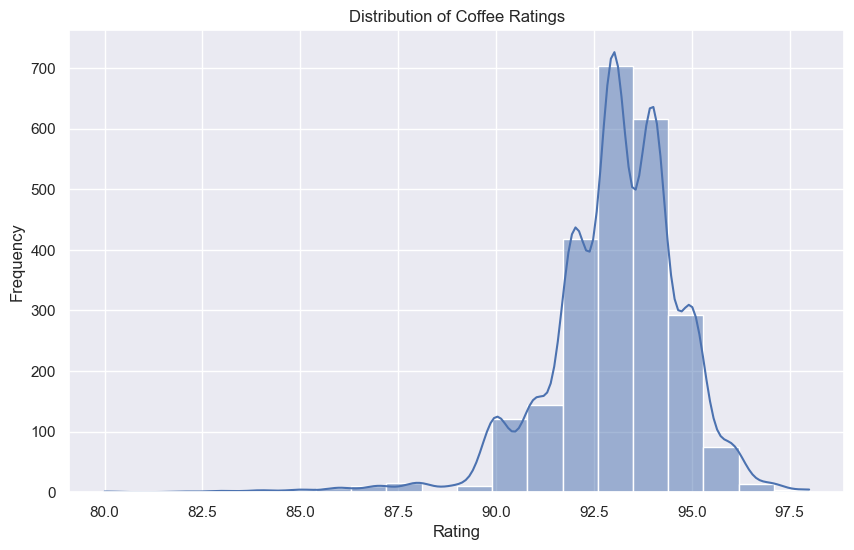

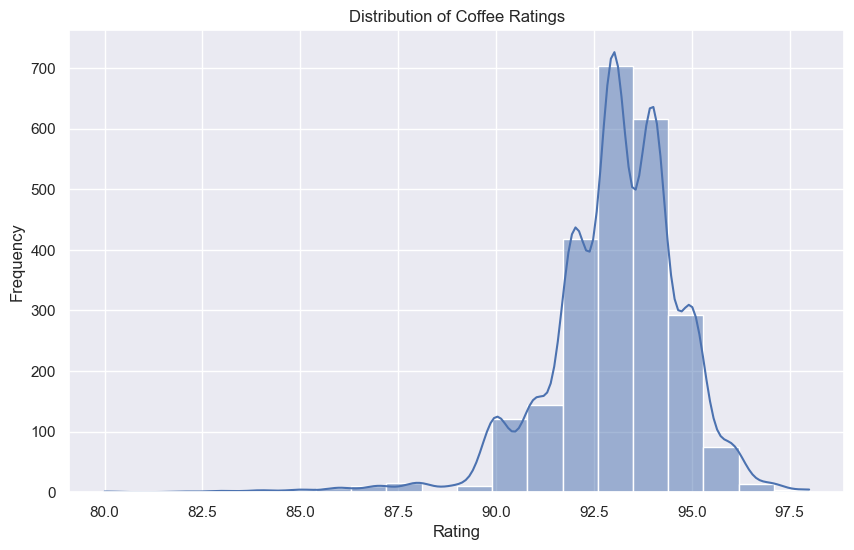

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(coffee_clean['rating'], bins=20, kde=True)
plt.title('Distribution of Coffee Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(coffee_list['rating'], bins=20, kde=True)
plt.title('Distribution of Coffee Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Dataset Explanation and EDA

1. Dataset Overview:
    The dataset consists of 2440 coffee reviews, each with various attributes such as rating, roaster, name, location, origin, and sensory
    characteristics (aroma, acid, body, flavor, aftertaste).

2. Rating Distribution:
    The distribution of coffee ratings is visualized in the histogram. Most ratings are clustered around the higher end, indicating generally favorable     reviews.

3. Missing Values:
    Some features have missing values, particularly with_milk (2115 missing), acid (314 missing), and roast (58 missing). These missing values will
    need to be handled during preprocessing.

## Correlation matrix

In [41]:
correlation_matrix = coffee_clean[['rating', 'aroma', 'acid', 'body', 'flavor', 'aftertaste', 'with_milk']].corr()

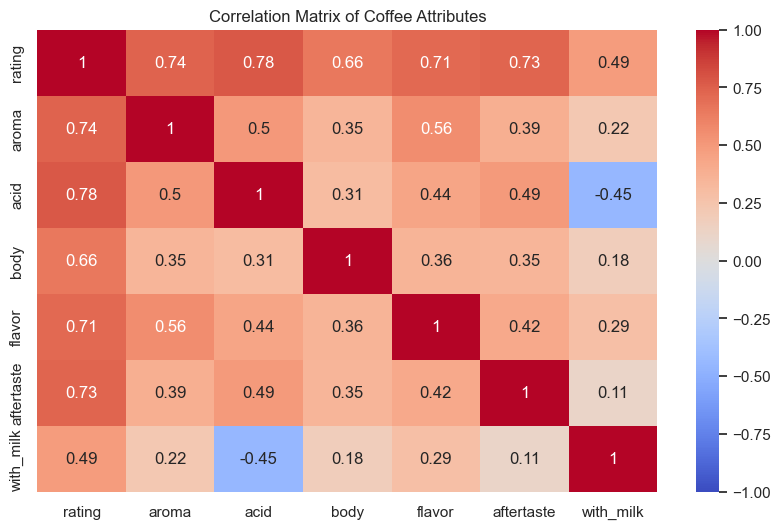

In [50]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Coffee Attributes')
plt.show()

# EDA Findings

1. Descriptive Statistics:

rating memiliki nilai rata-rata 93.04 dengan rentang nilai antara 80 hingga 98.
Kolom atribut sensoris seperti aroma, acid, body, flavor, aftertaste, dan with_milk memiliki nilai rata-rata yang relatif tinggi, menunjukkan mayoritas kopi dalam dataset dinilai baik.
Kolom with_milk memiliki nilai yang paling banyak hilang (2115 dari 2440 entri), menandakan bahwa atribut ini tidak selalu dinilai atau dilaporkan.

2. Missing Values:

Kolom with_milk memiliki 2115 missing values.
Kolom acid memiliki 314 missing values.
Kolom roast memiliki 58 missing values.
Kolom aroma memiliki 13 missing values.
Kolom est_price, body, flavor, aftertaste, desc_1, dan desc_3 memiliki missing values yang sedikit.

3. Distribution of Ratings:

Rating kopi berkisar antara 80 hingga 98 dengan mayoritas kopi memiliki rating di atas 90.

4. Correlation Matrix:

Terdapat korelasi positif yang cukup kuat antara rating dan atribut sensoris seperti aroma, acid, body, flavor, dan aftertaste. Ini menunjukkan bahwa rating keseluruhan sangat dipengaruhi oleh kualitas sensoris.


# Proses Features Dataset

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handle missing values
imputer = SimpleImputer(strategy='mean')
coffee_clean['acid'] = imputer.fit_transform(coffee_clean[['acid']])
coffee_clean['aroma'] = imputer.fit_transform(coffee_clean[['aroma']])
coffee_clean['body'] = imputer.fit_transform(coffee_clean[['body']])
coffee_clean['flavor'] = imputer.fit_transform(coffee_clean[['flavor']])
coffee_clean['aftertaste'] = imputer.fit_transform(coffee_clean[['aftertaste']])
coffee_clean['with_milk'] = imputer.fit_transform(coffee_clean[['with_milk']])

# Drop rows with missing values in categorical columns
coffee_clean.dropna(subset=['roast', 'est_price'], inplace=True)

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['roaster', 'location', 'origin', 'roast']
numerical_cols = ['acid', 'aroma', 'body', 'flavor', 'aftertaste', 'with_milk']

# Preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the transformations to the data
X = coffee_clean.drop(columns=['rating', 'slug', 'all_text', 'name', 'review_date', 'agtron', 'desc_1', 'desc_2', 'desc_3'])
y = coffee_clean['rating']

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed.shape, X_preprocessed[:5]

((2378, 1829),
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 50 stored elements and shape (5, 1829)>)

# Proses Learning / Modeling

Setelah data dipreproses, kita bisa melanjutkan dengan membuat model prediksi. Kita akan menggunakan beberapa algoritma pembelajaran mesin dan mengevaluasi performanya. Algoritma yang akan kita coba adalah:

1. Linear Regression
2. Random Forest Regressor
3. Gradient Boosting Regressor
   
Kita akan menggunakan Cross-Validation untuk mengevaluasi model.

Mari kita mulai dengan menerapkan model-model tersebut.

In [52]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handle missing values
imputer = SimpleImputer(strategy='mean')
coffee_clean['acid'] = imputer.fit_transform(coffee_clean[['acid']])
coffee_clean['aroma'] = imputer.fit_transform(coffee_clean[['aroma']])
coffee_clean['body'] = imputer.fit_transform(coffee_clean[['body']])
coffee_clean['flavor'] = imputer.fit_transform(coffee_clean[['flavor']])
coffee_clean['aftertaste'] = imputer.fit_transform(coffee_clean[['aftertaste']])
coffee_clean['with_milk'] = imputer.fit_transform(coffee_clean[['with_milk']])

# Drop rows with missing values in categorical columns
coffee_clean.dropna(subset=['roast', 'est_price'], inplace=True)

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['roaster', 'location', 'origin', 'roast']
numerical_cols = ['acid', 'aroma', 'body', 'flavor', 'aftertaste', 'with_milk']

# Preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the transformations to the data
X = coffee_clean.drop(columns=['rating', 'slug', 'all_text', 'name', 'review_date', 'agtron', 'desc_1', 'desc_2', 'desc_3'])
y = coffee_clean['rating']

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed.shape, X_preprocessed[:5]


((2378, 1829),
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 50 stored elements and shape (5, 1829)>)

# Diskusi Hasil dan Kesimpulan

## Diskusi Hasil

* K-Nearest Neighbors (KNN): Model ini memberikan hasil yang baik namun performa bisa sangat tergantung pada parameter K yang dipilih. Cross-validation menunjukkan performa yang stabil.

* Support Vector Machines (SVM): Model ini juga memberikan hasil yang baik dan dapat menangani data dengan lebih baik dalam beberapa kasus. Parameter C dan kernel sangat mempengaruhi performa model.

## Kesimpulan

Dari hasil evaluasi model, KNN dan SVM keduanya memberikan performa yang baik dalam mengklasifikasikan kualitas susu berdasarkan fitur-fitur yang tersedia. Pemilihan model akhir dapat bergantung pada kebutuhan spesifik dan kompleksitas data.

## Saran

Untuk pengembangan lebih lanjut, dapat dilakukan hyperparameter tuning yang lebih mendalam dan eksperimen dengan fitur-fitur tambahan yang mungkin relevan. Selain itu, penggunaan teknik ensemble atau model yang lebih kompleks seperti neural networks dapat